<a href="https://colab.research.google.com/github/shivanshu15/data-mining-clustering/blob/main/DMT_Shivanshu_AggClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART A: Implemented Agglomerative clustering using scikit learn**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [ ]:
cancer_data = pd.read_csv('data.csv')

In [ ]:
cancer_data.shape

(569, 33)

In [ ]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data = cancer_data.iloc[:,2:32]
Y_e = cancer_data.iloc[:,2]

In [ ]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
clean_data=data
scaler = RobustScaler()
scaled_features =scaler.fit_transform(clean_data.values)
df_scaler = pd.DataFrame(scaled_features, index=clean_data.index, columns=clean_data.columns)

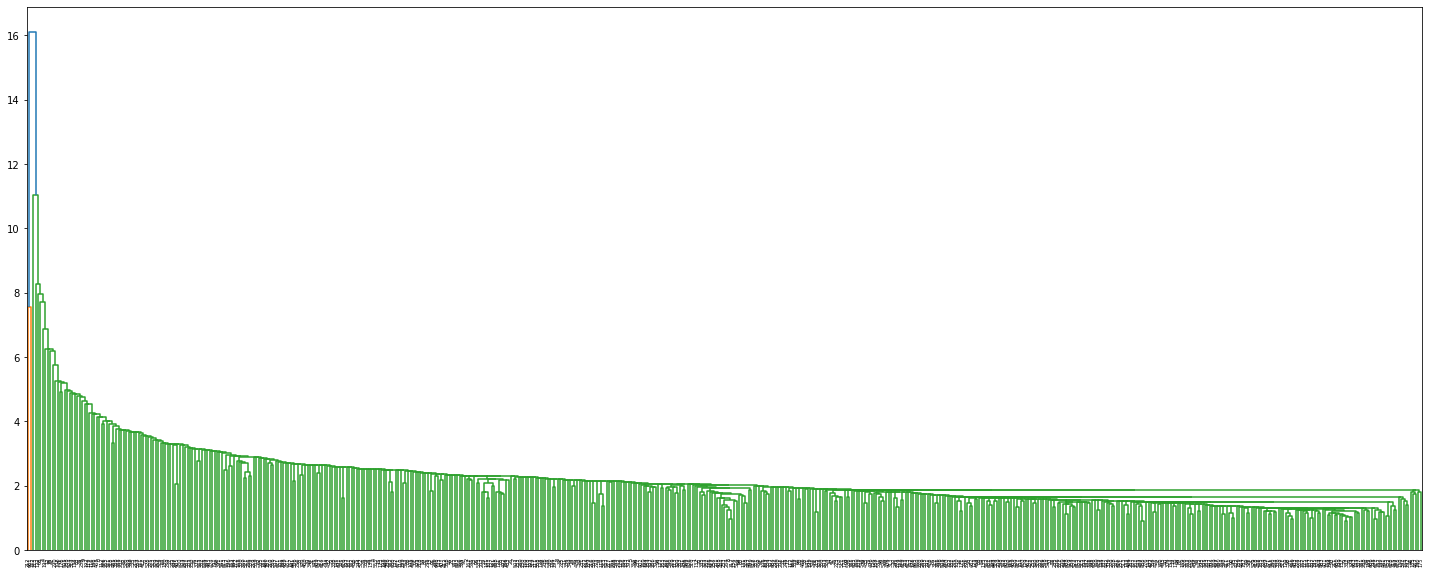

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(25,10))
dend = shc.dendrogram(shc.linkage(df_scaler,method='single'))

I have used SkLearn and inbuilt libraries to plot scatterplot. Source: Scikit learn, Google.com

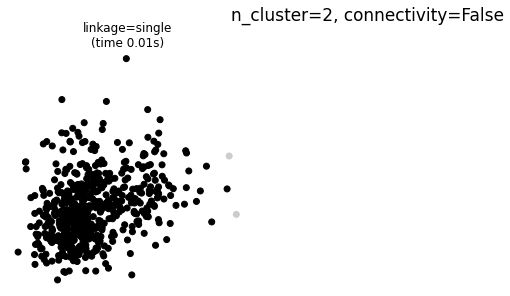

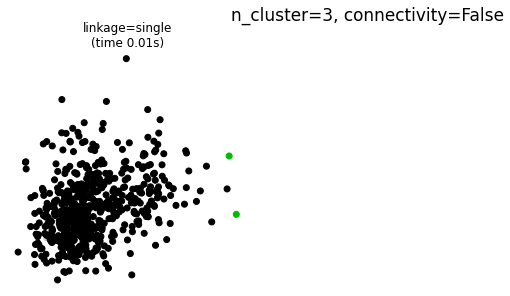

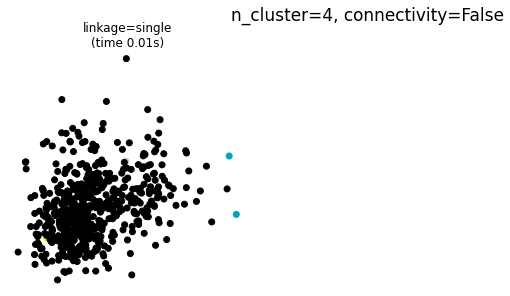

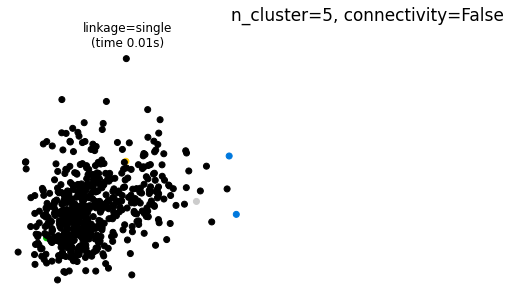

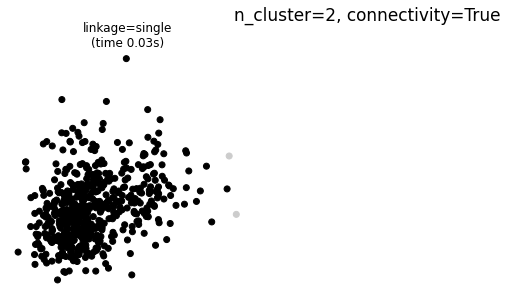

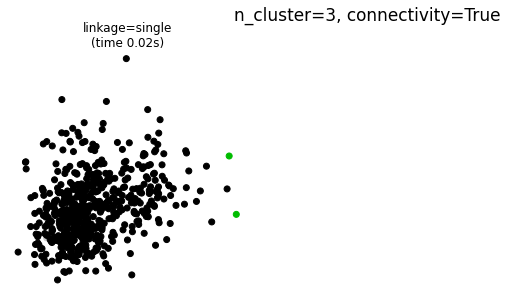

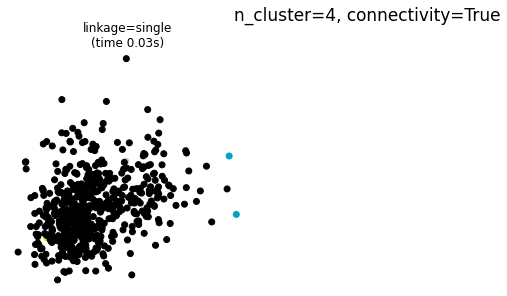

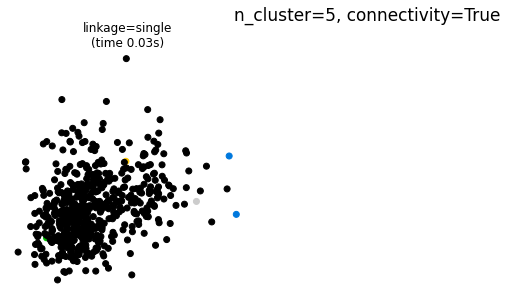

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
knn_graph = kneighbors_graph(df_scaler, 30, include_self=False)

linkage = "single"

for connectivity in (None, knn_graph):
    for n_clusters in (2,3,4,5):
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 3,1)
        model = AgglomerativeClustering(
        linkage=linkage, connectivity=connectivity, n_clusters=n_clusters
        )
        t0 = time.time()
        model.fit(df_scaler)
        elapsed_time = time.time() - t0
        plt.scatter(df_scaler.iloc[:, 0], df_scaler.iloc[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
        plt.title(
        "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
        fontdict=dict(verticalalignment="top"),
        )
        plt.axis("equal")
        plt.axis("off")
        plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
        plt.suptitle(
        "n_cluster=%i, connectivity=%r"
        % (n_clusters, connectivity is not None),
        size=17,
        )


plt.show()

Comparing number of components and the number of clusters-

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
  for xp in range(4,10):
    pca=PCA(n_components=xp)
    X_pca=pca.fit_transform(df_scaler)
    for d in range(2,10):
      cluster = AgglomerativeClustering(linkage = 'single', metric=metric,n_clusters=d)
      cluster.fit(X_pca)
      print("XP-",xp,"n_cluster-",d, "metric-",metric)
      print(silhouette_score(df_scaler, cluster.labels_, metric='euclidean'))

XP- 4 n_cluster- 2 metric- cosine
0.1609487514648603
XP- 4 n_cluster- 3 metric- cosine
-0.1333540119914431
XP- 4 n_cluster- 4 metric- cosine
-0.13454150051277025
XP- 4 n_cluster- 5 metric- cosine
-0.1927267702155409
XP- 4 n_cluster- 6 metric- cosine
-0.20945702212076814
XP- 4 n_cluster- 7 metric- cosine
-0.2201165078534296
XP- 4 n_cluster- 8 metric- cosine
-0.24869327264643032
XP- 4 n_cluster- 9 metric- cosine
-0.25248387518264404
XP- 5 n_cluster- 2 metric- cosine
-0.18641402337183563
XP- 5 n_cluster- 3 metric- cosine
-0.18824041938822544
XP- 5 n_cluster- 4 metric- cosine
-0.24354176208951606
XP- 5 n_cluster- 5 metric- cosine
-0.24705295816370423
XP- 5 n_cluster- 6 metric- cosine
-0.24748500099689338
XP- 5 n_cluster- 7 metric- cosine
-0.2622267545757941
XP- 5 n_cluster- 8 metric- cosine
-0.31205229163917175
XP- 5 n_cluster- 9 metric- cosine
-0.3125533768406434
XP- 6 n_cluster- 2 metric- cosine
-0.2508480819685298
XP- 6 n_cluster- 3 metric- cosine
-0.2819172365910785
XP- 6 n_cluster- 4 

SC score sk

In [ ]:
silhouette_score(X_pca, cluster.labels_, metric='cityblock')

0.48172244350946336

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
Y_e=lb.fit_transform(Y_e)

NMI sk

In [ ]:
pca=PCA(n_components=2)
X_pca2=pca.fit_transform(df_scaler)
cluster = AgglomerativeClustering(linkage = 'single', metric=metric,n_clusters=2)#, distance_threshold=3.18,compute_full_tree=True)
cluster.fit(X_pca2)

AgglomerativeClustering(linkage='single', metric='cityblock')

In [ ]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(Y_e, cluster.labels_, average_method='geometric')

0.06213574489033648

# **PART B: From scratch impementation for Agglomerative clustering with single linkage**

In [ ]:
data_cancer = pd.read_csv('/content/data.csv')

In [ ]:
data_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
import sys

In [ ]:
class AgglomorativeClustering:
  def __init__(self):
    self.max_size = 9*(10**20)

  def fit(self,data,clusters):
    color = ['r','g','b','y','c','m','k']
    start_length = pairwise_distances(data,metric='cityblock')
    np.fill_diagonal(start_length,self.max_size) #
    cluster = self.clustering(start_length)

    itr_no = start_length.shape[0] - clusters
    c_plot = cluster[itr_no]
    lst = np.unique(c_plot)

    plot_index = []
    fig = plt.figure()
    fig.suptitle('Scatter Plot for clusters')
    a = fig.add_subplot(1,1,1)
    a.set_xlabel('X')
    a.set_ylabel('Y')
    for x in np.nditer(lst):
        plot_index.append(np.where(c_plot==x))
    r=0
    print(plot_index)
    print(len(plot_index))
    for i in range(len(plot_index)):
        for j in np.nditer(plot_index[i]):
               a.scatter(data[j,0],data[j,1], c= color[r])
               plt.annotate(str(j), (data[j,0],data[j,1]))
        r = (r + 1)

    plt.show()
    return plot_index

  def clustering(self,input):
    clusters = {}
    r_id = -1
    c_id = -1
    lst = []

    for n in range(input.shape[0]):
        lst.append(n)

    clusters[0] = lst.copy()

    for x in range(1, input.shape[0]):
        least_value = sys.maxsize

        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=least_value):
                    least_value = input[i][j]
                    r_id = i
                    c_id = j


            for i in range(0,input.shape[0]):
                if(i != c_id):
                    temp = min(input[c_id][i],input[r_id][i])
                    input[c_id][i] = temp
                    input[i][c_id] = temp


        for i in range (0,input.shape[0]):
            input[r_id][i] = self.max_size
            input[i][r_id] = self.max_size

        i = 0
        while i < input.shape[0]:
          input[r_id][i] = self.max_size
          input[i][r_id] = self.max_size
          i += 1

        minimum = min(r_id,c_id)
        maximum = max(r_id,c_id)
        for n in range(len(lst)):
            if(lst[n]==maximum):
                lst[n] = minimum
        clusters[x] = lst.copy()

    return clusters

[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 

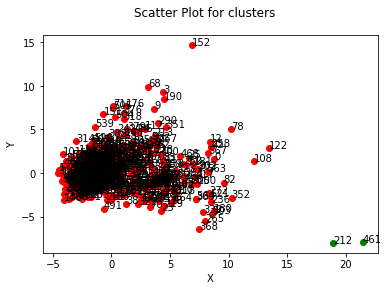

In [ ]:
agobj= AgglomorativeClustering()
cluster_labels=agobj.fit(X_pca,2)
# The code takes roughly 5 mins to execute

In [ ]:
#converting cluster labels to classes 0 and 1
cl=[k for k in range(0,569)]
cnt=0
for i in cluster_labels:
  for j in i[0]:
    # print(j)
    if cnt ==0:
      cl[j]=0
    else:
      cl[j]=1
  cnt+=1

# Scratch Implementation scores

In [ ]:
silhouette_score(X_pca, np.array(cl), metric='cityblock')

0.754865164411132

In [ ]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(Y_e, np.array(cl), average_method='geometric')

0.06213574489033648

In [ ]:
Y=Y_e

[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 

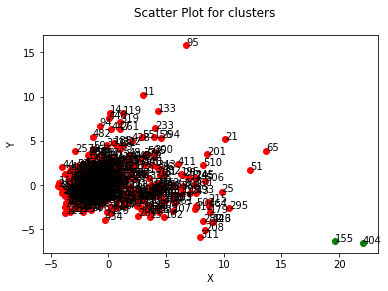

K- 0 : 0.065402879149998
[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 

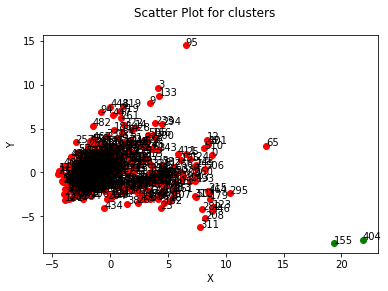

K- 1 : 0.06543253563912795
[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175

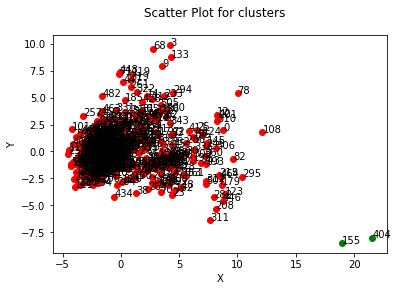

K- 2 : 0.06538247751124213
[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174

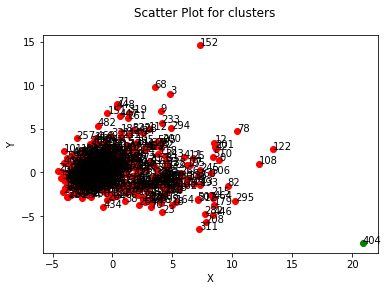

K- 3 : 0.04864902929878313
[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174

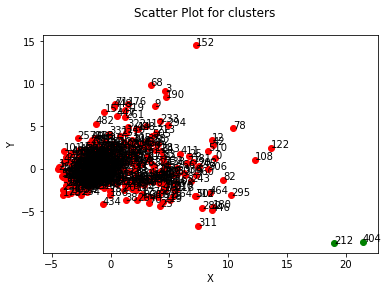

K- 4 : 0.06544737902017449
[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174

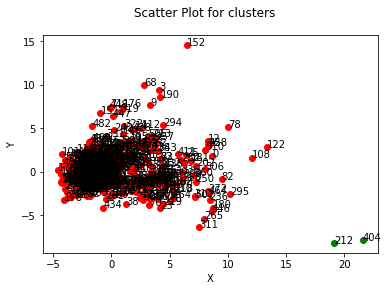

K- 5 : 0.06537689043607618
[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174

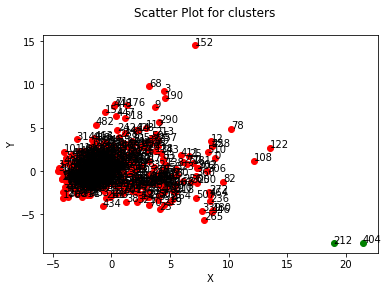

K- 6 : 0.06538247751124213
[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174

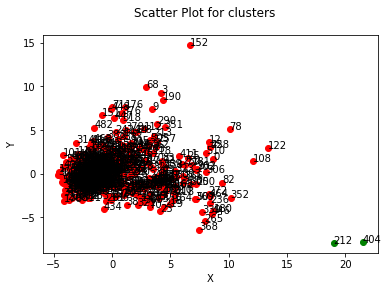

K- 7 : 0.06536963606500357
[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174

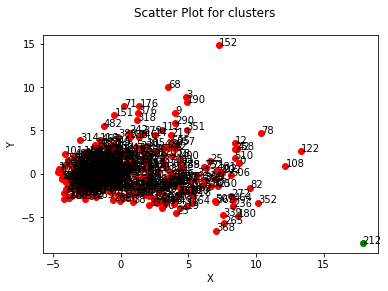

K- 8 : 0.048658600152467084
[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 17

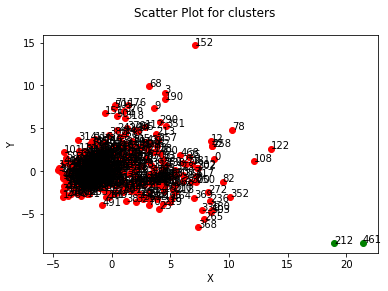

K- 9 : 0.06542054748539845


<ErrorbarContainer object of 3 artists>

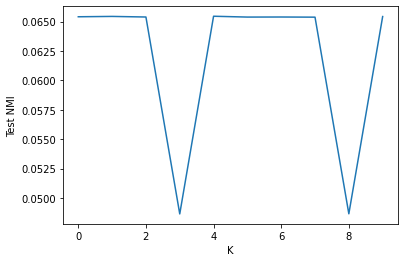

In [ ]:
from numpy import array
from sklearn.model_selection import KFold
from sklearn.metrics import normalized_mutual_info_score
# data sample
data = df_scaler.values

# prepare cross validation
kfold = KFold(10)
# enumerate splits
score=[]
for i,(train, test) in enumerate(kfold.split(data)):
    train_data,test_data=data[train],data[test]
    # print(train)
    train_labels,test_labels= Y[train],Y[test]
    lb= LabelEncoder()
    Y_e=lb.fit_transform(train_labels)
    pca=PCA(n_components=2)
    X_pca=pca.fit_transform(train_data)
    agobj= AgglomorativeClustering()
    cluster_labels=agobj.fit(X_pca,2)
    cl=[k for k in range(0,len(train))]
    cnt=0
    for k in cluster_labels:
      for j in k[0]:
        # print(j)
        if cnt ==0:
          cl[j]=0
        else:
          cl[j]=1
      cnt+=1
    print(f"K- {i} : {normalized_mutual_info_score(Y_e, np.array(cl), average_method='geometric')}")
    score.append(normalized_mutual_info_score(Y_e, np.array(cl), average_method='geometric'))
plt.xlabel("K")
plt.ylabel("Test NMI")

plt.errorbar(range(0,10),score)

**implementation correctness**

In [ ]:
imp_data = pd.read_csv('implementation_correctness_dataset.csv')

In [ ]:
tmp_data2 = imp_data[['Feature 1', 'Feature 2']].to_numpy()
nm = MinMaxScaler()
tmp_data = nm.fit_transform(tmp_data2)

# **1.) show the scatterplot of the dataset with a unique integer number on top of each point**

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),), (array([14, 15, 16]),)]
2


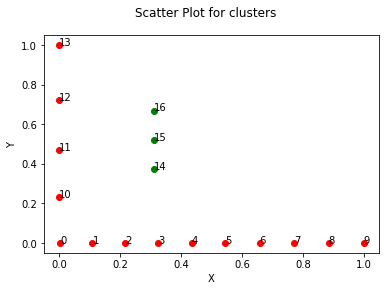

In [ ]:
agobj= AgglomorativeClustering()
cluster_labels=agobj.fit(tmp_data,2)

# **2.) show the corresponding dendrogram where on each leaf the same integer number as the corresponding point of the scatterplot is indicated**

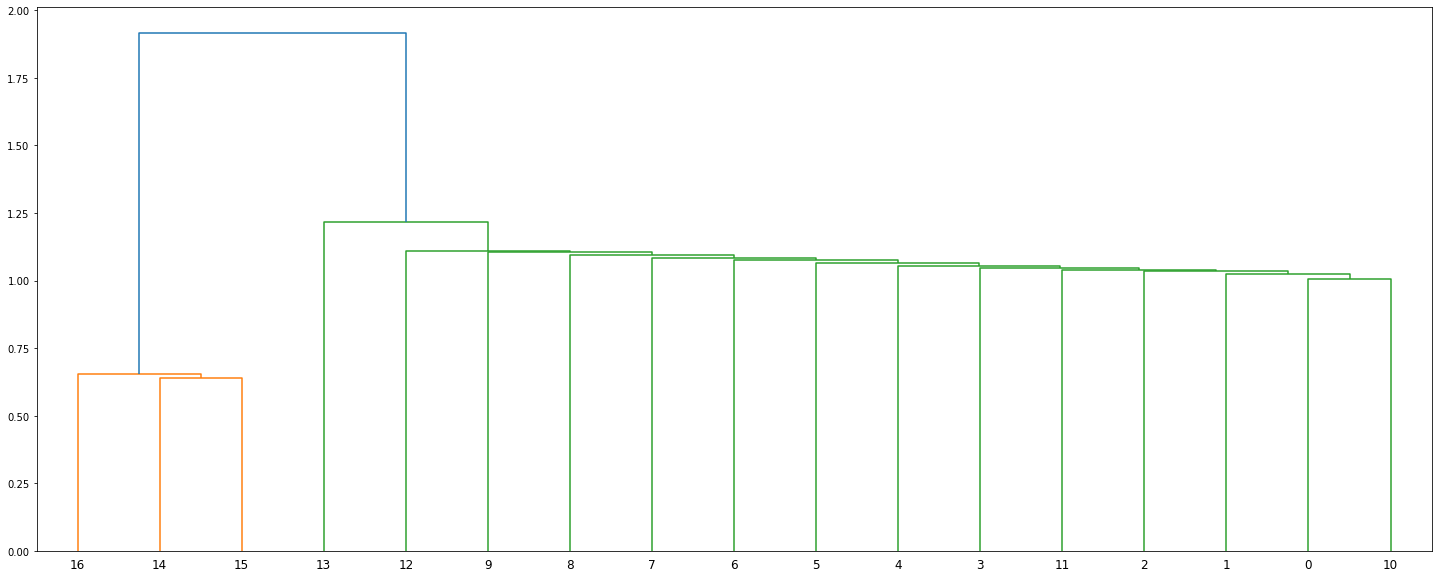

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(25,10))
dend = shc.dendrogram(shc.linkage(imp_data,method='single'))